In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"D:\Datasets\housing\train.csv")
test_data = pd.read_csv(r"D:\Datasets\housing\test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

In [5]:
test_data.shape

(1459, 80)

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
null_col_count= train_data.isna().sum()

In [15]:
null_col_count.loc[null_col_count>100]

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [16]:
train_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [17]:
train_data.shape

(1460, 76)

In [21]:
null_sum = train_data.isna().sum()
null_sum[null_sum > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [22]:
cat_df = train_data.select_dtypes(object)
int_df = train_data.select_dtypes(int)
float_df = train_data.select_dtypes(float)
num_df = pd.concat([float_df,int_df],axis=1)

##### Handling Unknowns of Numerical Dataframe

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [28]:
num_df = pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns)

In [29]:
num_df.isna().sum().sum()

0

Handling Unknowns of Categorical Dataframe

In [30]:
imputer_cat = SimpleImputer(strategy='most_frequent')

In [31]:
cat_df = pd.DataFrame(imputer_cat.fit_transform(cat_df),columns = cat_df.columns)

As the columns are too much we have to find coorelation between some of them to rduce them

In [32]:
num_df['Home Age'] = 2022 - num_df['YearBuilt']
num_df['Home Modified Time'] = 2022 - num_df['YearRemodAdd']
num_df['RateYearBack'] = 2022-num_df['YrSold']

In [33]:
# num_df_test['Home Age'] = 2022 - num_df_test['YearBuilt']
# num_df_test['Home Modified Time'] = 2022 - num_df_test['YearRemodAdd']
# num_df_test['RateYearBack'] = 2022-num_df_test['YrSold']

In [34]:
num_df.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)
train_data.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [36]:
corr = num_df.corr()
corr['SalePrice']

LotFrontage           0.334771
MasVnrArea            0.472614
GarageYrBlt           0.466754
Id                   -0.021917
MSSubClass           -0.084284
LotArea               0.263843
OverallQual           0.790982
OverallCond          -0.077856
BsmtFinSF1            0.386420
BsmtFinSF2           -0.011378
BsmtUnfSF             0.214479
TotalBsmtSF           0.613581
1stFlrSF              0.605852
2ndFlrSF              0.319334
LowQualFinSF         -0.025606
GrLivArea             0.708624
BsmtFullBath          0.227122
BsmtHalfBath         -0.016844
FullBath              0.560664
HalfBath              0.284108
BedroomAbvGr          0.168213
KitchenAbvGr         -0.135907
TotRmsAbvGrd          0.533723
Fireplaces            0.466929
GarageCars            0.640409
GarageArea            0.623431
WoodDeckSF            0.324413
OpenPorchSF           0.315856
EnclosedPorch        -0.128578
3SsnPorch             0.044584
ScreenPorch           0.111447
PoolArea              0.092404
MiscVal 

In [37]:
num_df['Garage Age'] = 2022 - num_df['GarageYrBlt']
num_df.drop('GarageYrBlt',axis=1,inplace=True)
train_data.drop('GarageYrBlt',axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
for i in cat_df.columns:
    cat_df[i] = le.fit_transform(cat_df[i])

In [40]:
# df = pd.DataFrame(trans_train, columns= arr)
# df_train = pd.concat([num_df,df],axis=1)
df_train = pd.concat([num_df,cat_df],axis=1)

In [41]:
df_train

,LotFrontage,MasVnrArea,Id,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,65.0,196.0,1.0,60.0,8450.0,7.0,5.0,706.0,0.0,150.0,...,4,2,6,1,1,4,4,2,8,4
1,80.0,0.0,2.0,20.0,9600.0,6.0,8.0,978.0,0.0,284.0,...,4,3,6,1,1,4,4,2,8,4
2,68.0,162.0,3.0,60.0,11250.0,7.0,5.0,486.0,0.0,434.0,...,4,2,6,1,1,4,4,2,8,4
3,60.0,0.0,4.0,70.0,9550.0,7.0,5.0,216.0,0.0,540.0,...,4,2,6,5,2,4,4,2,8,0
4,84.0,350.0,5.0,60.0,14260.0,8.0,5.0,655.0,0.0,490.0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1456.0,60.0,7917.0,6.0,5.0,0.0,0.0,953.0,...,4,3,6,1,1,4,4,2,8,4
1456,85.0,119.0,1457.0,20.0,13175.0,6.0,6.0,790.0,163.0,589.0,...,4,3,2,1,2,4,4,2,8,4
1457,66.0,0.0,1458.0,70.0,9042.0,7.0,9.0,275.0,0.0,877.0,...,4,2,6,1,1,4,4,2,8,4
1458,68.0,0.0,1459.0,20.0,9717.0,5.0,6.0,49.0,1029.0,0.0,...,0,2,6,1,2,4,4,2,8,4


In [42]:
corr['SalePrice']['MoSold']

0.046432245223819446

In [44]:
corr['SalePrice'][corr['SalePrice'] > 0.5]

OverallQual     0.790982
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [120]:
df_train['OverallQual'].unique()

array([ 7.,  6.,  8.,  5.,  9.,  4., 10.,  3.,  1.,  2.])

In [45]:
corr['SalePrice'][corr['SalePrice'] < -0.5]

Home Age             -0.522897
Home Modified Time   -0.507101
Name: SalePrice, dtype: float64

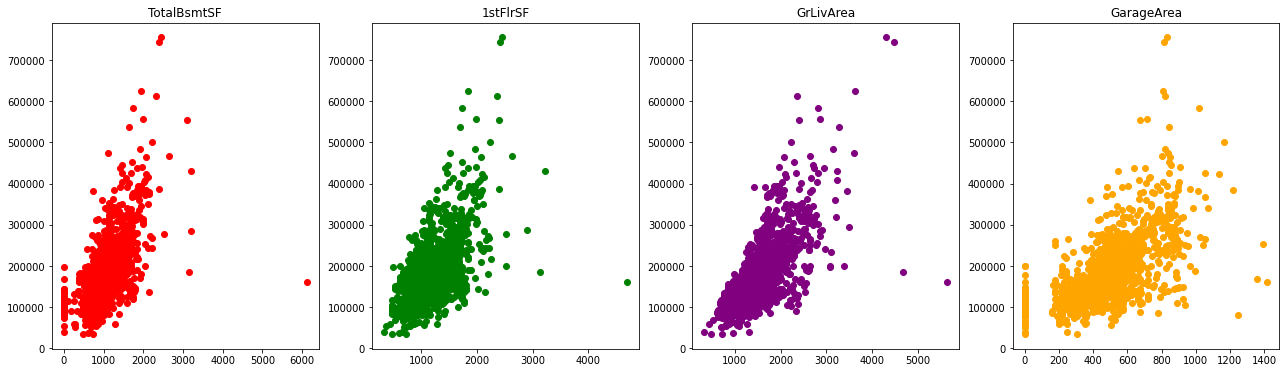

In [123]:
fig,ax = plt.subplots(1,4,figsize = (22,6))
col = [df_train['TotalBsmtSF'],df_train['1stFlrSF'],df_train['GrLivArea'],df_train['GarageArea']]
name = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
color = ['r','g','purple','orange']
for i in range(4):
    ax[i].set_title(name[i])
    ax[i].scatter(col[i],df_train['SalePrice'],color=color[i])

In [50]:
df_train['SalePrice'][df_train['OverallQual'] > 8]

11      345000.0
34      277500.0
45      319900.0
53      385000.0
58      438780.0
          ...   
1313    333168.0
1359    315000.0
1373    466500.0
1388    377500.0
1442    310000.0
Name: SalePrice, Length: 61, dtype: float64

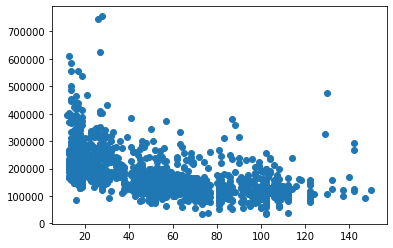

In [71]:
plt.scatter(df_train['Home Age'],df_train['SalePrice'])
plt.show()

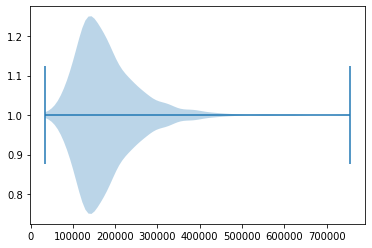

In [77]:
plt.violinplot(df_train['SalePrice'],vert=False)
plt.show()

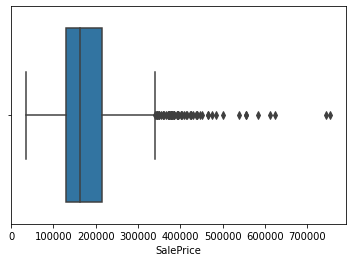

In [80]:
sns.boxplot(x = df_train['SalePrice'])
plt.show()

In [82]:
X= df_train.drop('SalePrice',axis=1)
y = df_train.SalePrice

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [84]:
lr_model = LinearRegression()
extr_model = ExtraTreesRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
rid_model = Ridge()
adbr_model = AdaBoostRegressor()

In [85]:
models = [lr_model,extr_model,rf_model,gbr_model,rid_model,adbr_model]
names = ['LinearRegression','ExtraTreesRegressor','RandomForestRegressor','GradientBoostingRegressor','Ridge','AdaBoost']
for name,model in zip(names,models):
    print(f'{name} score : {cross_val_score(model,X,y,cv=3)}')
    print('---------------------------------------------------------------------------')


LinearRegression score : [0.87382563 0.81673084 0.73639321]
---------------------------------------------------------------------------
ExtraTreesRegressor score : [0.89663958 0.84139012 0.81922528]
---------------------------------------------------------------------------
RandomForestRegressor score : [0.8873174  0.85102248 0.82094832]
---------------------------------------------------------------------------
GradientBoostingRegressor score : [0.90509256 0.86158689 0.88233444]
---------------------------------------------------------------------------
Ridge score : [0.87372869 0.81666265 0.73657611]
---------------------------------------------------------------------------
AdaBoost score : [0.84636413 0.81566079 0.75585954]
---------------------------------------------------------------------------


In [86]:
for name,model in zip(names,models):
    print(f'{name} parameters : {model.get_params()}')
    print('---------------------------------------------------------------------------')

LinearRegression parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
---------------------------------------------------------------------------
ExtraTreesRegressor parameters : {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---------------------------------------------------------------------------
RandomForestRegressor parameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, '

In [87]:
param = [{'learning_rate':[1,0.01,0.001,5],'n_estimators' : [50,60,80,90]} ]
grid_model  = GridSearchCV(gbr_model,param,cv=4,return_train_score=True)
grid_model.fit(X,y)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [1, 0.01, 0.001, 5],
                          'n_estimators': [50, 60, 80, 90]}],
             return_train_score=True)

In [88]:
grid_model.best_score_

0.7862931346824218

In [89]:
grid_model.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [90]:
grbt_clf = GradientBoostingRegressor()
grbt_clf.fit(X.drop('Id',axis=1),y)
# grbt_clf.score(X_test,y_test)

GradientBoostingRegressor()

In [91]:
rf_model.fit(X.drop('Id',axis=1),y)

RandomForestRegressor()

In [94]:
for col,score in zip(X.columns,rf_model.feature_importances_):
    print(f"{col} :  {round(score,7)}")

LotFrontage :  0.0057958
MasVnrArea :  0.0062347
Id :  0.0015153
MSSubClass :  0.0137903
LotArea :  0.5868262
OverallQual :  0.0040176
OverallCond :  0.027505
BsmtFinSF1 :  0.0004756
BsmtFinSF2 :  0.0052964
BsmtUnfSF :  0.0379082
TotalBsmtSF :  0.0210244
1stFlrSF :  0.0378558
2ndFlrSF :  0.000158
LowQualFinSF :  0.1075318
GrLivArea :  0.0010539
BsmtFullBath :  0.0001758
BsmtHalfBath :  0.0017382
FullBath :  0.0008356
HalfBath :  0.0013917
BedroomAbvGr :  0.0009975
KitchenAbvGr :  0.0069821
TotRmsAbvGrd :  0.0032747
Fireplaces :  0.0221431
GarageCars :  0.0136685
GarageArea :  0.0040791
WoodDeckSF :  0.0050518
OpenPorchSF :  0.0007547
EnclosedPorch :  0.0002682
3SsnPorch :  0.001697
ScreenPorch :  0.000266
PoolArea :  7.96e-05
MiscVal :  0.0034309
MoSold :  0.0095466
Home Age :  0.0076886
Home Modified Time :  0.0015106
RateYearBack :  0.0048616
Garage Age :  0.001868
MSZoning :  5.6e-06
Street :  0.0018097
LotShape :  0.0014391
LandContour :  0.0
Utilities :  0.0010286
LotConfig :  0.0

In [95]:
X.drop(['BsmtFinType2','GarageQual','LandContour','MSZoning','PoolArea'],axis=1,inplace=True)

In [96]:
rf_model.fit(X.drop('Id',axis=1),y)

RandomForestRegressor()

In [97]:
grbt_clf.fit(X.drop('Id',axis=1),y)

GradientBoostingRegressor()

In [98]:
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [99]:
test_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [100]:
test_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [101]:
cat_df_test = test_data.select_dtypes(object)
int_df_test = test_data.select_dtypes(int)
float_df_test = test_data.select_dtypes(float)
num_df_test = pd.concat([float_df_test,int_df_test],axis=1)

In [102]:
num_df_test = pd.DataFrame(imputer.fit_transform(num_df_test),columns=num_df_test.columns)
cat_df_test = pd.DataFrame(imputer_cat.fit_transform(cat_df_test),columns=cat_df_test.columns)

In [103]:
num_df_test['Home Age'] = 2022 - num_df_test['YearBuilt']
num_df_test['Home Modified Time'] = 2022 - num_df_test['YearRemodAdd']
num_df_test['RateYearBack'] = 2022-num_df_test['YrSold']

In [104]:
num_df_test.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [105]:
num_df_test['Garage Age'] = 2022 - num_df_test['GarageYrBlt']
num_df_test.drop('GarageYrBlt',axis=1,inplace=True)

In [106]:
for i in cat_df_test.columns:
    cat_df_test[i] = le.fit_transform(cat_df_test[i])

In [107]:
X_test = pd.concat([num_df_test,cat_df_test],axis=1)

In [108]:
col = list(df_train.columns)
col.remove('SalePrice')
X_test = X_test[col]

In [109]:
X_test.drop(['BsmtFinType2','GarageQual','LandContour','MSZoning','PoolArea'],axis=1,inplace=True)

In [110]:
y_pred = grbt_clf.predict(X_test.drop('Id',axis=1))

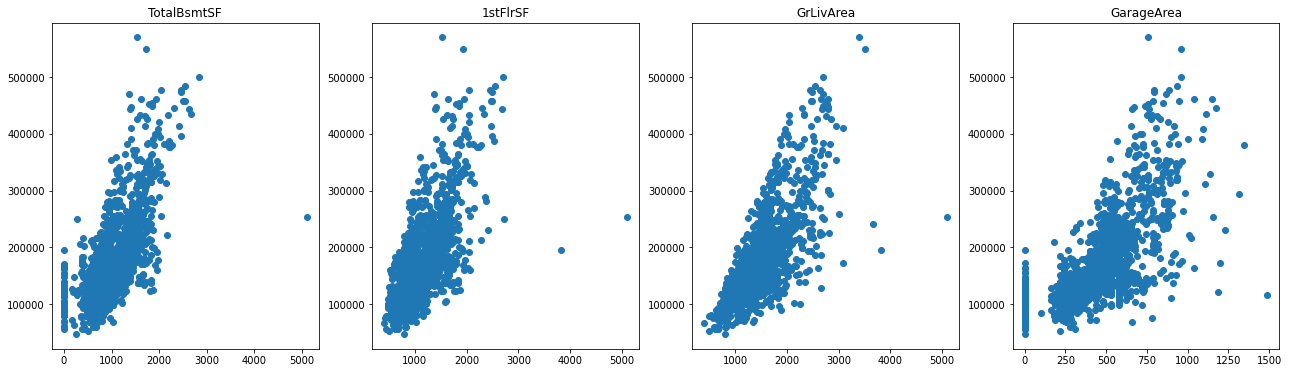

In [116]:
fig,ax = plt.subplots(1,4,figsize = (22,6))
col = [X_test['TotalBsmtSF'],X_test['1stFlrSF'],X_test['GrLivArea'],X_test['GarageArea']]
name = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
for i in range(4):
    ax[i].set_title(name[i])
    ax[i].scatter(col[i],y_pred)

In [72]:
df1 = pd.concat([X_test.Id,pd.Series(y_pred)],axis = 1)

In [74]:
df1 = df1.rename(columns={0:'SalePrice'})

In [75]:
df1.Id  =df1.Id.astype(int)

In [76]:
# df1.to_csv("D:\Datasets\housing\submission_upd.csv",index=False)

In [77]:
# df2.to_csv("D:\Datasets\housing\submission_rf.csv",index=False)

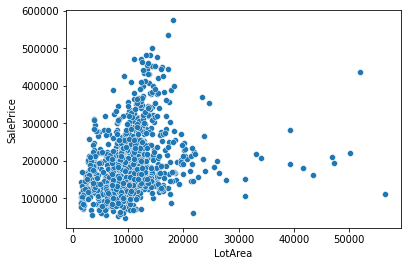

In [83]:
sns.scatterplot(x=X_test.LotArea,y=df1.SalePrice)
# sns.regplot(x=X_test.LotArea,y =df1.SalePrice )
plt.show()